In [2]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)
import seaborn as sns

In [3]:
"""

https://help.aliyun.com/document_detail/159145.html
人体姿态关键点

BodyPosture可以获取人体的十八个关键点信息。包括：nose、neck、right_shoudler、
right_elbow、right_wrist、left_shoudler、left_elbow、left_wrist、right_hip、right_knee、right_ankle、left_hip、
left_knee、left_ankle、right_eye、left_eye、right_ear、left_ear"""

from aliyunsdkfacebody.request.v20191230.BodyPostureRequest import BodyPostureRequest

request = BodyPostureRequest()
request.set_accept_format('json')

filepath="images/人体2.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath
request.set_ImageURL(url)

response = client.do_action_with_exception(request)
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': '5D3902BB-BD33-5748-AF57-B93E22C4BD6A', 'Data': {'MetaObject': {'Height': 800, 'Width': 533}, 'Outputs': [{'Results': [{'Bodies': [{'Confident': 0.7394627332687378, 'Label': 'nose', 'Positions': [{'Points': [0.5694444179534912, 0.14130434393882751]}]}, {'Confident': 0.688110888004303, 'Label': 'neck', 'Positions': [{'Points': [0.5879629850387573, 0.25]}]}, {'Confident': 0.6811688542366028, 'Label': 'right_shoudler', 'Positions': [{'Points': [0.46759259700775146, 0.2554347813129425]}]}, {'Confident': 0.6633850336074829, 'Label': 'right_elbow', 'Positions': [{'Points': [0.42129629850387573, 0.3804347813129425]}]}, {'Confident': 0.6713557243347168, 'Label': 'right_wrist', 'Positions': [{'Points': [0.49074074625968933, 0.45108696818351746]}]}, {'Confident': 0.6367168426513672, 'Label': 'left_shoudler', 'Positions': [{'Points': [0.7037037014961243, 0.25]}]}, {'Confident': 0.739377498626709, 'Label': 'left_elbow', 'Positions': [{'Points': [0.7361111044883728, 0.3695652186870575

In [4]:
MetaObject=response['Data']['MetaObject']
MetaObject # 图片基本信息。

{'Height': 800, 'Width': 533}

In [5]:
Outputs=response['Data']['Outputs'][0]['Results'][0]
Outputs

{'Bodies': [{'Confident': 0.7394627332687378,
   'Label': 'nose',
   'Positions': [{'Points': [0.5694444179534912, 0.14130434393882751]}]},
  {'Confident': 0.688110888004303,
   'Label': 'neck',
   'Positions': [{'Points': [0.5879629850387573, 0.25]}]},
  {'Confident': 0.6811688542366028,
   'Label': 'right_shoudler',
   'Positions': [{'Points': [0.46759259700775146, 0.2554347813129425]}]},
  {'Confident': 0.6633850336074829,
   'Label': 'right_elbow',
   'Positions': [{'Points': [0.42129629850387573, 0.3804347813129425]}]},
  {'Confident': 0.6713557243347168,
   'Label': 'right_wrist',
   'Positions': [{'Points': [0.49074074625968933, 0.45108696818351746]}]},
  {'Confident': 0.6367168426513672,
   'Label': 'left_shoudler',
   'Positions': [{'Points': [0.7037037014961243, 0.25]}]},
  {'Confident': 0.739377498626709,
   'Label': 'left_elbow',
   'Positions': [{'Points': [0.7361111044883728, 0.3695652186870575]}]},
  {'Confident': 0.7219685912132263,
   'Label': 'left_wrist',
   'Positio

In [6]:
HumanCount=response['Data']['Outputs'][0]['HumanCount']
HumanCount # 个数。

1

In [7]:
width=MetaObject['Width']
height=MetaObject['Height']

In [8]:
KeyPoints=Outputs["Bodies"]
KeyPoints

[{'Confident': 0.7394627332687378,
  'Label': 'nose',
  'Positions': [{'Points': [0.5694444179534912, 0.14130434393882751]}]},
 {'Confident': 0.688110888004303,
  'Label': 'neck',
  'Positions': [{'Points': [0.5879629850387573, 0.25]}]},
 {'Confident': 0.6811688542366028,
  'Label': 'right_shoudler',
  'Positions': [{'Points': [0.46759259700775146, 0.2554347813129425]}]},
 {'Confident': 0.6633850336074829,
  'Label': 'right_elbow',
  'Positions': [{'Points': [0.42129629850387573, 0.3804347813129425]}]},
 {'Confident': 0.6713557243347168,
  'Label': 'right_wrist',
  'Positions': [{'Points': [0.49074074625968933, 0.45108696818351746]}]},
 {'Confident': 0.6367168426513672,
  'Label': 'left_shoudler',
  'Positions': [{'Points': [0.7037037014961243, 0.25]}]},
 {'Confident': 0.739377498626709,
  'Label': 'left_elbow',
  'Positions': [{'Points': [0.7361111044883728, 0.3695652186870575]}]},
 {'Confident': 0.7219685912132263,
  'Label': 'left_wrist',
  'Positions': [{'Points': [0.59722220897674

In [9]:
Positions=[ (int(e[0]*width),int(e[1]*height)) for e in [j['Points'] for j in [ i[0] for i in [Positions["Positions"] for Positions in  KeyPoints]]]]
Positions[0]

(303, 113)

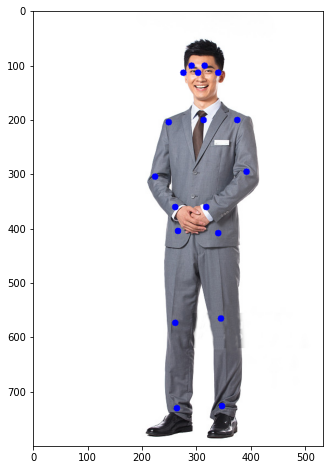

In [10]:
plt.figure(figsize=(12,8))
res=plt.imread(filepath)
for i in range(len(Positions)):
    res=cv2.circle(res,Positions[i],6, (0,0,255),-1)
plt.imshow(res)

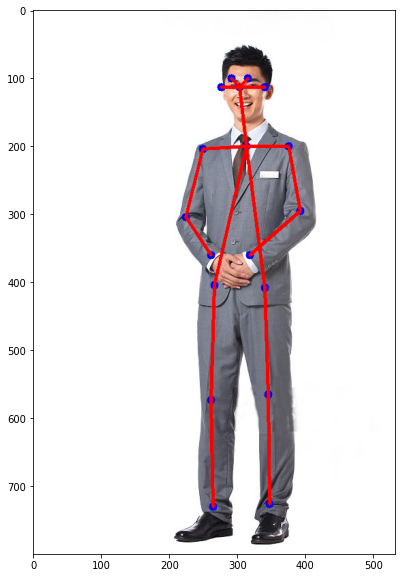

In [11]:
plt.figure(figsize=(15,10))

# 头部
cv2.line(res, Positions[0], Positions[14], (255,0,0),4)
cv2.line(res, Positions[0], Positions[15], (255,0,0),4)
# 耳朵
cv2.line(res, Positions[0], Positions[16], (255,0,0),4)
cv2.line(res, Positions[0], Positions[17], (255,0,0),4)

# 头连接驱干

cv2.line(res, Positions[0], Positions[1], (255,0,0),4)

# 左胳膊
color2=(255,0,0)
cv2.line(res, Positions[1], Positions[2], color2,4)
cv2.line(res, Positions[2], Positions[3], color2,4)
cv2.line(res, Positions[3], Positions[4], color2,4)


# 右胳膊
color2=(255,0,0)
cv2.line(res, Positions[1], Positions[5], color2,4)
cv2.line(res, Positions[5], Positions[6], color2,4)
cv2.line(res, Positions[6], Positions[7], color2,4)

# 左腿
color2=(255,0,0)
cv2.line(res, Positions[1], Positions[8], color2,4)
cv2.line(res, Positions[8], Positions[9], color2,4)
cv2.line(res, Positions[9], Positions[10], color2,4)

# 右腿
color2=(255,0,0)
cv2.line(res, Positions[1], Positions[11], color2,4)
cv2.line(res, Positions[11], Positions[12], color2,4)
cv2.line(res, Positions[12], Positions[13], color2,4)

plt.imshow(res)

In [12]:
from PIL import Image
im = Image.fromarray(res)
im.save("images/人体姿态关键点.jpg")